# Clasificadores

Un clasificador de aprendizaje automatico es un objet computacional que tiene dos etapas:
- Se "entrena". Toma sus datos de entrenamiento, que son un conjunto de puntos de datos y la etiqueta correcta asociada a ellos, e intenta aprender algun patron sobre como los puntos se asignan a las etiquetas
- Una vez que se haentremado, el clasificador actua

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

C:\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# nombre -> (Formato de linea, nombre del clasificador)
CLASS_MAP = {'Logistic Regression': ('-', LogisticRegression()), 
            'Naive Bayes': ('--', GaussianNB()),
            'Decision Tree': ('-_', DecisionTreeClassifier(max_depth=5)),
            'Random Forest': (':', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1))}

In [4]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
X,Y = df[df.columns[:3]], (df['species']=='virginica')

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.8)

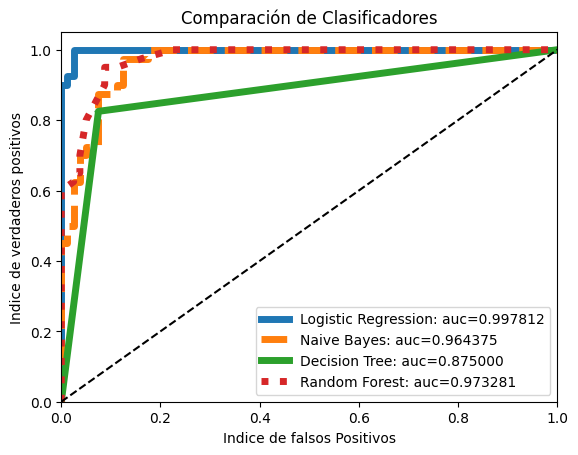

In [9]:
for nombre, (line_fmt, model) in CLASS_MAP.items():
    model.fit(X_train, Y_train)
    preds= model.predict_proba(X_test)
    prediccion = pd.Series(preds[:,1])
    fpr, tpr, umbral = roc_curve(Y_test, prediccion)
    auc_score = auc(fpr, tpr)
    etiqueta= '%s: auc=%f' % (nombre, auc_score)
    plt.plot(fpr, tpr, line_fmt, linewidth=5, label=etiqueta)
plt.legend(loc='lower right')
plt.title('Comparación de Clasificadores')
plt.plot([0,1 ], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Indice de falsos Positivos')
plt.ylabel('Indice de verdaderos positivos')
plt.show()

In [10]:
from transformers import BertTokennizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

ModuleNotFoundError: No module named 'transformers'